In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# The train_users table

In [2]:
train_users = pd.read_csv('csvdata/train_users_2.csv')
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [3]:
# cleaning the train_users dataframe 

train_users.timestamp_first_active = pd.to_datetime(train_users.timestamp_first_active.astype(str))
train_users.date_first_booking = pd.to_datetime(train_users.date_first_booking)
train_users.date_account_created = pd.to_datetime(train_users.date_account_created)

#dict_genders = {'-unknown-' : 'unknown', 'MALE' : 'male', 'FEMALE' : 'female', 'OTHER' : 'other'}
#train_users.gender = train_users.gender.apply(lambda x: dict_genders[x])

train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [4]:
# only keep the users for whom date_account_created matches timestamp_first_active 
# this is true for all the users in the test_users table, and for almost all the users in the train_users table 

train_users = train_users[train_users.timestamp_first_active.dt.date == train_users.date_account_created.dt.date]

In [5]:
# calculate the age buckets and add them to the train_users table 

def calc_age_bucket(age):
    if age < 100.0:
        return (age // 5.0) + 1
    elif age >= 100.0:
        return 21.0
    elif np.isnan(age):
        return 0.0

train_users['age_bucket'] = train_users.age.apply(calc_age_bucket).astype('category')

In [6]:
# create features: year, month, day and dayofweek from date_account_created. 

train_users.loc[:,'year'] = train_users.date_account_created.dt.year.astype('category')
train_users.loc[:,'month'] = train_users.date_account_created.dt.month.astype('category')
train_users.loc[:,'day'] = train_users.date_account_created.dt.day.astype('category')
train_users.loc[:,'dayofweek'] = train_users.date_account_created.dt.dayofweek.astype('category')

# mark a these columns as categorical data
mylist = ['gender', 'signup_method', 'language', 'affiliate_channel', 
          'affiliate_provider', 'first_affiliate_tracked', 'signup_flow', 
          'signup_app', 'first_device_type', 'first_browser','age_bucket']
for x in mylist:
    train_users.loc[:,x] = train_users[x].astype('category')

# mydict = {2:'s1', 3:'s1', 4:'s1', 
#           5:'s2', 6:'s2', 7:'s2', 
#           8:'s3', 9:'s3', 10:'s3',
#           11:'s4', 12:'s4', 1:'s4'}
# train_users.loc[:,'season'] = train_users.date_account_created.dt.month.apply(lambda x: mydict[x]).astype('category')

# only keep the users from 2014 for now - 
train_users = train_users[(train_users.year == 2014)]

In [7]:
# drop date_account_created and timestamp_first active
train_users = train_users.set_index('id')
#ids = train_users.id
train_users = train_users.drop(['date_account_created', 'timestamp_first_active', 'age', 'country_destination'], axis=1)

In [8]:
# separate the date_first_booking column as a column of 1/0
# drop all the date_first_booking values - they're not present in the test_users table. 

y_users = train_users.date_first_booking.notnull().astype(int)

train_users = train_users.drop('date_first_booking', axis=1)

# The sessions table

In [9]:
sessions = pd.read_csv('csvdata/sessions.csv')
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [10]:
# add features coming from the sessions table 
# this includes stuff such as number of clicks and many other things 
# all of this is numerical data

for y in ['action', 'action_type', 'action_detail']:
    df = sessions.groupby(['user_id', y]).size().unstack()

    for x in df.columns:
        s = df[x]
        train_users[y + '_' + x] = train_users.join(s)[x].fillna(0)

# The model

In [11]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [12]:
X_users = pd.get_dummies(train_users)
X_users.head()

,action_10,action_11,action_12,action_15,action_about_us,action_accept_decline,action_account,action_acculynk_bin_check_failed,action_acculynk_bin_check_success,action_acculynk_load_pin_pad,...,day_29,day_30,day_31,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
id,,,,,,,,,,,,,,,,,,,,,
d1mm9tcy42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
yo8nz8bqcq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4grx6yxeby,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
ncf87guaf0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4rvqpxoh3h,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [13]:
booked_ya = X_users[y_users.astype(bool)]
booked_na = X_users[~(y_users.astype(bool))]

# resampled X_users and y_users 
# X_users = pd.concat([booked_ya.iloc[np.random.choice(len(booked_ya),10000)], 
#                         booked_na.iloc[np.random.choice(len(booked_na),10000)]])

# y_users = pd.Series(np.concatenate((np.zeros(100000, dtype=int)+1, np.zeros(100000, dtype=int))))

Fold 1 out of 5:
training error : 22.1495
testing error  : 22.4977103232
roc auc score  : 0.83405049381
------------------------------


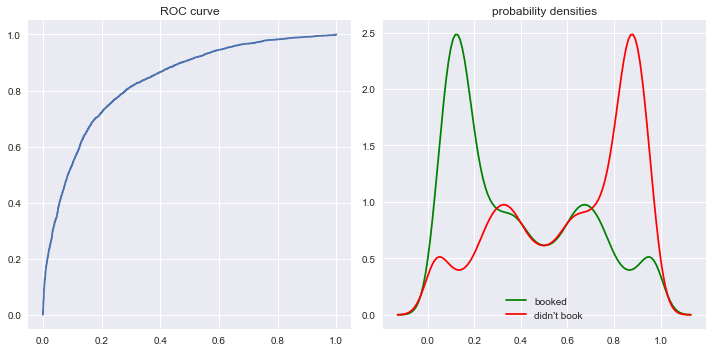

****************************************************************************************************
Fold 2 out of 5:
training error : 21.98
testing error  : 22.8444328143
roc auc score  : 0.834534043993
------------------------------


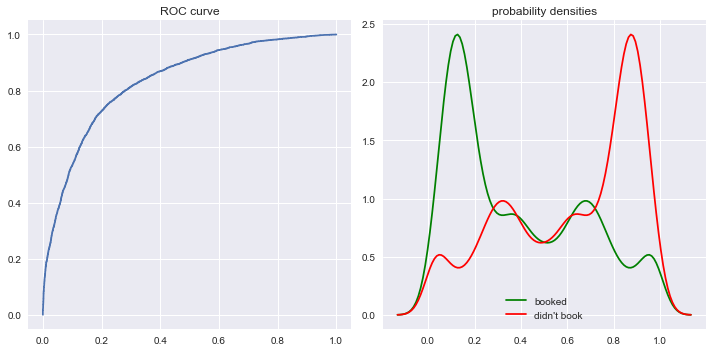

****************************************************************************************************
Fold 3 out of 5:
training error : 22.0845
testing error  : 22.3014523093
roc auc score  : 0.835967766812
------------------------------


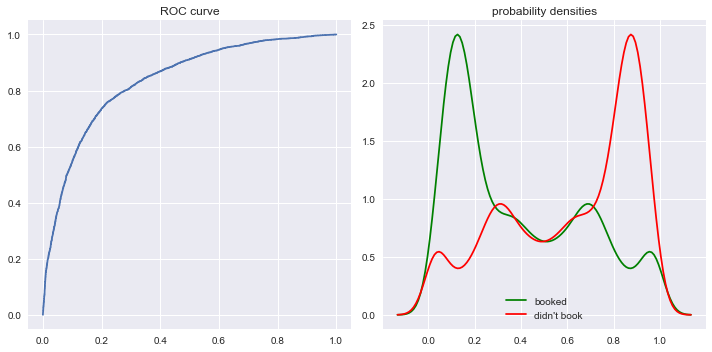

****************************************************************************************************
Fold 4 out of 5:
training error : 21.8795
testing error  : 22.6220070653
roc auc score  : 0.838636542275
------------------------------


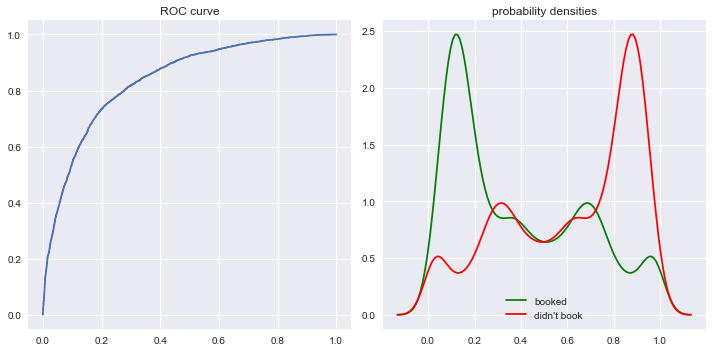

****************************************************************************************************
Fold 5 out of 5:
training error : 22.1025
testing error  : 22.4337585868
roc auc score  : 0.836747239989
------------------------------


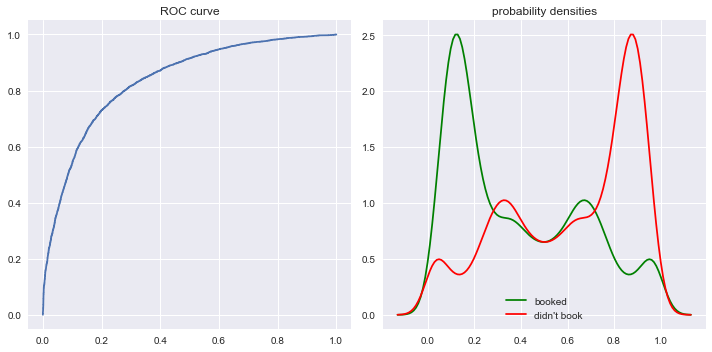

****************************************************************************************************


In [14]:
kf = KFold(n_splits=5, shuffle=True)
fold = 0
for train, cv in kf.split(X_users):
    fold = fold + 1
    print 'Fold', fold, 'out of 5:'
    X_train, X_cv = X_users.iloc[train], X_users.iloc[cv]
    y_train, y_cv = y_users.iloc[train], y_users.iloc[cv]
    
    # resample X_train:
    samples = np.random.choice(len(X_train), 200000)
    X_train = X_train.iloc[samples]
    y_train = y_train.iloc[samples]
    
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    
    predictions_train = clf.predict(X_train)
    print 'training error :', (100. - (y_train == predictions_train).sum() * 100. / float(len(y_train)))
    prob_train = clf.predict_proba(X_train)
    
    predictions_test = clf.predict(X_cv)
    print 'testing error  :', (100. - (y_cv == predictions_test).sum() * 100. / float(len(y_cv)))
    prob_cv = clf.predict_proba(X_cv)
    
    print 'roc auc score  :', roc_auc_score(y_cv, prob_cv[:, 1])
    print '-'*30
    
    fpr, tpr, thresholds = roc_curve(y_cv, prob_cv[:, 1])
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
    ax1.plot(fpr, tpr)
    ax1.set_title('ROC curve')
    ax2 = sns.kdeplot(prob_cv[:,1], color='green', label='booked')
    ax2 = sns.kdeplot(prob_cv[:,0], color='red', label='didn\'t book')
    ax2.set_title('probability densities')
    fig.tight_layout()
    plt.show()
    print '*'*100
    #ax = sns.kdeplot(prob_cv[:, 1])

In [ ]:
s = pd.Series(clf.coef_[0])
s = s[s.abs() > 0.1]
len(s)

In [ ]:
#s = pd.Series(clf.feature_importances_).sort_values(ascending=False)

In [ ]:
X_u = X_users[X_users.columns[s.iloc[:].index]]

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
for train, cv in kf.split(X_u):
    X_train, X_cv = X_u.iloc[train], X_u.iloc[cv]
    y_train, y_cv = y_users.iloc[train], y_users.iloc[cv]
    #newclf = RandomForestClassifier(n_estimators=100, oob_score=True)
    newclf = LogisticRegression()
    newclf.fit(X_train, y_train)
    
    predictions_train = newclf.predict(X_train)
    print 'training error:', (100. - (y_train == predictions_train).sum() * 100. / float(len(y_train)))
    prob_train = newclf.predict_proba(X_train)
    
    predictions_test = newclf.predict(X_cv)
    print 'testing error:', (100. - (y_cv == predictions_test).sum() * 100. / float(len(y_cv)))
    prob_cv = newclf.predict_proba(X_cv)
    
    print 'roc auc score  :', roc_auc_score(y_cv, prob_cv[:, 1])
    print '-'*30
    
    fpr, tpr, thresholds = roc_curve(y_cv, prob_cv[:, 1])
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
    ax1.plot(fpr, tpr)
    ax1.set_title('ROC curve')
    ax2 = sns.kdeplot(prob_cv[:,1], color='green', label='booked')
    ax2 = sns.kdeplot(prob_cv[:,0], color='red', label='didn\'t book')
    ax2.set_title('probability densities')
    fig.tight_layout()
    plt.show()
    print '*'*100


In [ ]:
featurelist = X_u.columns
for i,x in enumerate(featurelist):
    for y in featurelist[i:]:
        X_u.loc[:, x + '*' + y] = X_u.loc[:, x] * X_u.loc[:, y]
print 'Yay! added more features!'

In [ ]:
fpr, tpr, thresholds = roc_curve(y_cv, prob_cv[:, 1])
fig, ax = plt.subplots()
#plt.plot(thresholds, fpr, color='blue')
#plt.plot(thresholds, tpr, color='green')
plt.plot(fpr, tpr)

In [ ]:
X_u.columns

In [ ]:
sessions.groupby(['user_id', 'action']).size().unstack()

In [ ]:
view = sessions.groupby(['user_id', 'action_type']).size().unstack().view
train_users['view'] = train_users.join(view).view.fillna(0)

In [ ]:
# add booking_request data

booking_request = sessions.groupby(['user_id', 'action_type']).size().unstack().booking_request
train_users['booking_request'] = train_users.join(booking_request).booking_request.fillna(0)

In [ ]:
# add the clicks data

click_series = sessions.groupby(['user_id', 'action_type']).size().unstack().click.sort_index()
train_users['click'] = train_users.join(click_series).click.fillna(0)

In [ ]:
train_users.set_index('id').loc[np.setdiff1d(train_users.id.unique(), sessions.user_id.unique())].groupby(['country_destination', 'year']).size().unstack()[2014].sum()

In [ ]:
# all the users in the sessions table are from 2014

train_users.set_index('id').loc[np.intersect1d(train_users.id.unique(), sessions.user_id.unique())].groupby(['year']).size()

In [ ]:
len(booked_ya), len(booked_na)

In [ ]:
len(np.intersect1d(ids.unique(), sessions.user_id.unique()))

In [ ]:
len(booked_ya), len(booked_na)

In [ ]:
train_users.isnull().sum().sort_values()

In [ ]:
ids = train_users.index

numeric = pd.DataFrame(pd.Series(data=0, index = ids))

# add features coming from the sessions table 

for y in ['action', 'action_type', 'action_detail']:
    df = sessions.groupby(['user_id', y]).size().unstack()

    for x in df.columns:
        s = df[x]
        numeric[y + '_' + x] = numeric.join(s)[x].fillna(0)

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(numeric)
numeric = pca.transform(numeric)

len(pca.explained_variance_ratio_[pca.explained_variance_ratio_ > 0.001])

numeric = pd.DataFrame(numeric[:,:22], index=ids)

In [ ]:
train_users = train_users.join(numeric)